In [13]:
import numpy as np
import os
from dataset import ImageDataset
from torch.utils.data import DataLoader
import torch
from vit_pytorch import ViT
from vit_pytorch.cct import CCT
from scripts.model import *
from vit_pytorch.recorder import Recorder
from vit_pytorch.extractor import Extractor

In [ ]:
img_dir = 'linsen_data'
annotations_file = 'linsen_data/annotations.csv'

BATCH_SIZE = 32
num_epochs = 10

ds_train = ImageDataset(annotations_file=annotations_file, img_dir=img_dir, set_type='train')
ds_test = ImageDataset(annotations_file=annotations_file, img_dir=img_dir, set_type='test')

dl_train = DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True)
dl_test = DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=True)

model_config = {
  'img_size' : (128, 128),
  'embedding_dim' : 32,
  'n_conv_layers' : 2,
  'kernel_size' : 7,
  'stride' : 2,
  'padding' : 3,
  'pooling_kernel_size' : 3,
  'pooling_stride' : 2,
  'pooling_padding' : 1,
  'num_layers' : 4,
  'num_heads' : 4,
  'mlp_ratio' : 3.,
  'num_classes' : 2,
  'positional_embedding' : 'learnable'
  }

model = CCT(
  img_size = model_config['img_size'],
  embedding_dim = model_config['embedding_dim'],
  n_conv_layers = model_config['n_conv_layers'],
  kernel_size = model_config['kernel_size'],
  stride = model_config['stride'],
  padding = model_config['padding'],
  pooling_kernel_size = model_config['pooling_kernel_size'],
  pooling_stride = model_config['pooling_stride'],
  pooling_padding = model_config['pooling_padding'],
  num_layers = model_config['num_layers'],
  num_heads = model_config['num_heads'],
  mlp_ratio = model_config['mlp_ratio'],
  num_classes = model_config['num_classes'],
  positional_embedding = model_config['positional_embedding']
)

model.load_state_dict(torch.load('models/cct/model.pth', weights_only=True))
        
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
loss_fn = torch.nn.CrossEntropyLoss()

154083


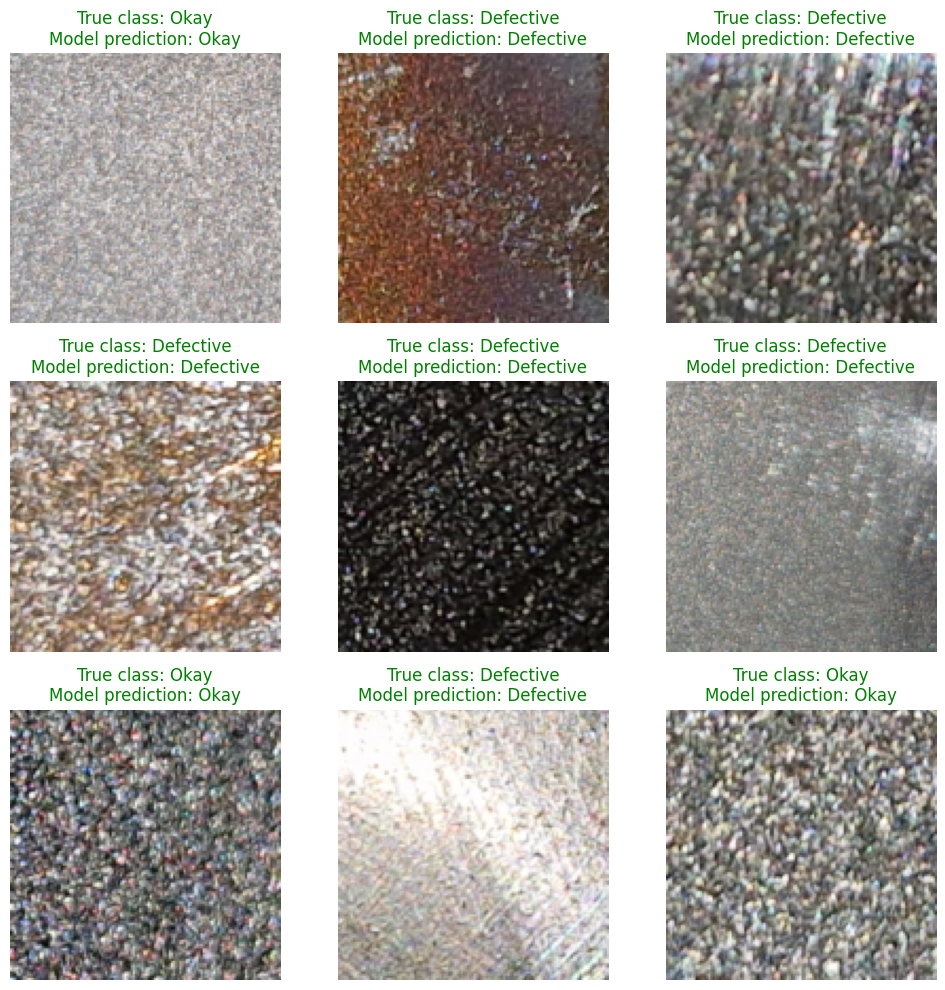

In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

def visualize_random_predictions(model, dataloader, class_names):
    model.eval()
    images, labels = next(iter(dataloader))
    indices = random.sample(range(len(images)), 9)
    selected_images = images[indices]
    selected_labels = labels[indices]
    predictions = model(selected_images).argmax(dim=1)

    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        img = selected_images[i].permute(1, 2, 0).numpy()
        true_label = selected_labels[i].item()
        pred_label = predictions[i].item()

        border_color = "green" if true_label == pred_label else "red"

        ax.imshow(img)
        ax.set_title(f"True class: {class_names[true_label]}\nModel prediction: {class_names[pred_label]}", color=border_color)
        ax.axis("off")
        for spine in ax.spines.values():
            spine.set_edgecolor(border_color)
            spine.set_linewidth(4)

    plt.tight_layout()
    plt.show()

class_names = ["Okay", "Defective"]

visualize_random_predictions(model, dl_test, class_names)